In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('heart.csv')
data

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Target:
1: People have heart disease
0: People don't have heart disease

All the other columns: features



In [3]:
'''
age - age of the person
sex - gender of the person
chest_pain_type - type of the chest pain
resting_bp - blood pressure while resting
cholesterol - person's cholestrol
fasting_blood_sugar - Blood sugar while fasting
restecg - ECG while resting
max_hr - Maximum heart rate
exang - ex angiogram
oldpeak - old peak
'''

"\nage - age of the person\nsex - gender of the person\nchest_pain_type - type of the chest pain\nresting_bp - blood pressure while resting\ncholesterol - person's cholestrol\nfasting_blood_sugar - Blood sugar while fasting\nrestecg - ECG while resting\nmax_hr - Maximum heart rate\nexang - ex angiogram\noldpeak - old peak\n"

We first check if there are duplicate values and remove them

In [4]:
duplicate_rows = data[data.duplicated()]
duplicate_rows

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [5]:
data.drop_duplicates(inplace=True)


In [6]:
data

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [7]:
features=data.drop('target',axis=1)
target = data['target']

In [8]:
features

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [9]:
target #remember 1 --> disease .......... 0 --> not disease

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 302, dtype: int64

Implement different models

DECISION TREE

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import  cross_val_score, cross_validate,cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix


In [11]:
clf = DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8032786885245902


In [12]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:')
print(cm)

Confusion matrix:
[[25  3]
 [ 9 24]]


<AxesSubplot:>

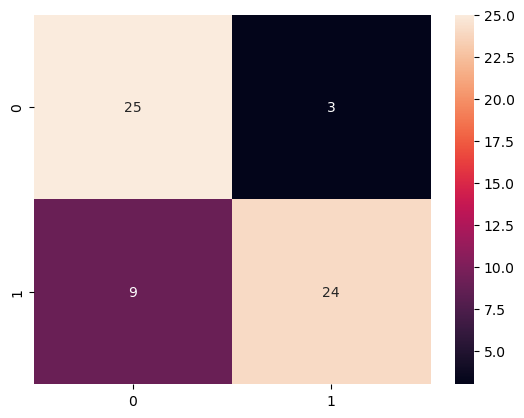

In [13]:
sns.heatmap(cm, annot=True, fmt='d')


Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier


In [41]:
rf = RandomForestClassifier()
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)
rf.fit(X_train, y_train)
y_pred1 = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred1)
print('Accuracy:', accuracy)

Accuracy: 0.8360655737704918


In [42]:
cm1 = confusion_matrix(y_test, y_pred1)
print('Confusion matrix:')
print(cm1)

Confusion matrix:
[[19  6]
 [ 4 32]]


<AxesSubplot:>

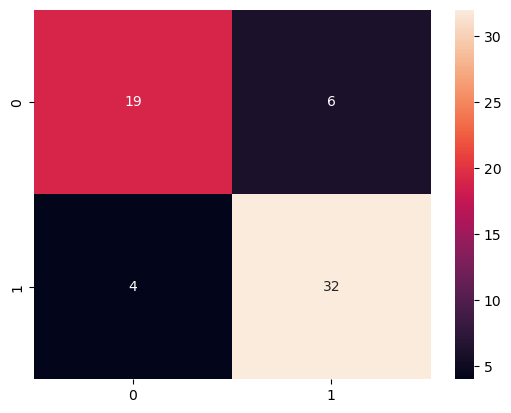

In [43]:
sns.heatmap(cm1, annot=True, fmt='d')


KNN

In [22]:
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred10 = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred10)
print('Accuracy:', accuracy)

Accuracy: 0.6065573770491803


/Users/kastanass/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Support Vector Machines

In [33]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred20 = svm.predict(X_test)

In [34]:
accuracy = accuracy_score(y_test, y_pred20)
print('Accuracy:', accuracy)


Accuracy: 0.9016393442622951


In [35]:
cm = confusion_matrix(y_test, y_pred20)
print('Confusion matrix:')
print(cm)


Confusion matrix:
[[23  4]
 [ 2 32]]


<AxesSubplot:>

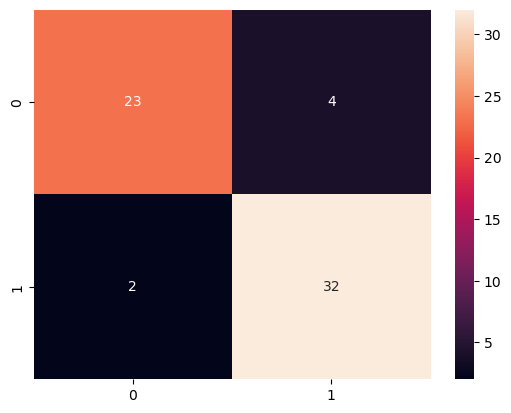

In [36]:
sns.heatmap(cm, annot=True, fmt='d')


Exploratory Data Analysis

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
data

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [12]:
data['sex']

0      1
1      1
2      0
3      1
4      0
      ..
298    0
299    1
300    1
301    1
302    0
Name: sex, Length: 302, dtype: int64

In [21]:
data['sex'] = data['sex'].replace({0: 'female', 1: 'male'})
data['target'] = data['target'].replace({0: 'No-Disease', 1: 'Disease'})


In [22]:
grouped = data.groupby(['sex', 'target']).size().unstack(fill_value=0)
grouped

target,Disease,No Disease
sex,,
female,72,24
male,92,114


<AxesSubplot:xlabel='sex', ylabel='count'>

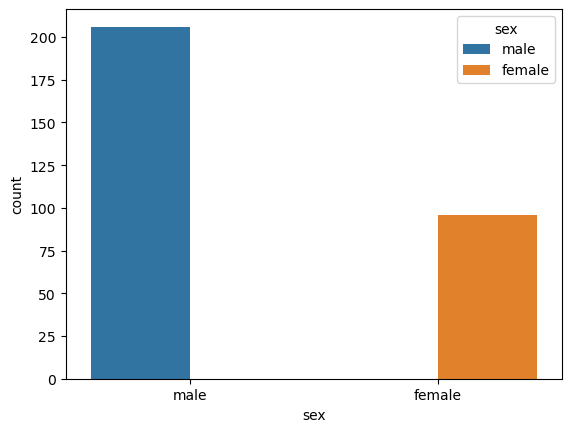

In [24]:
sns.countplot(x='sex', hue='sex', data=data)


We can discuss about which plot we want and then we can visualize better

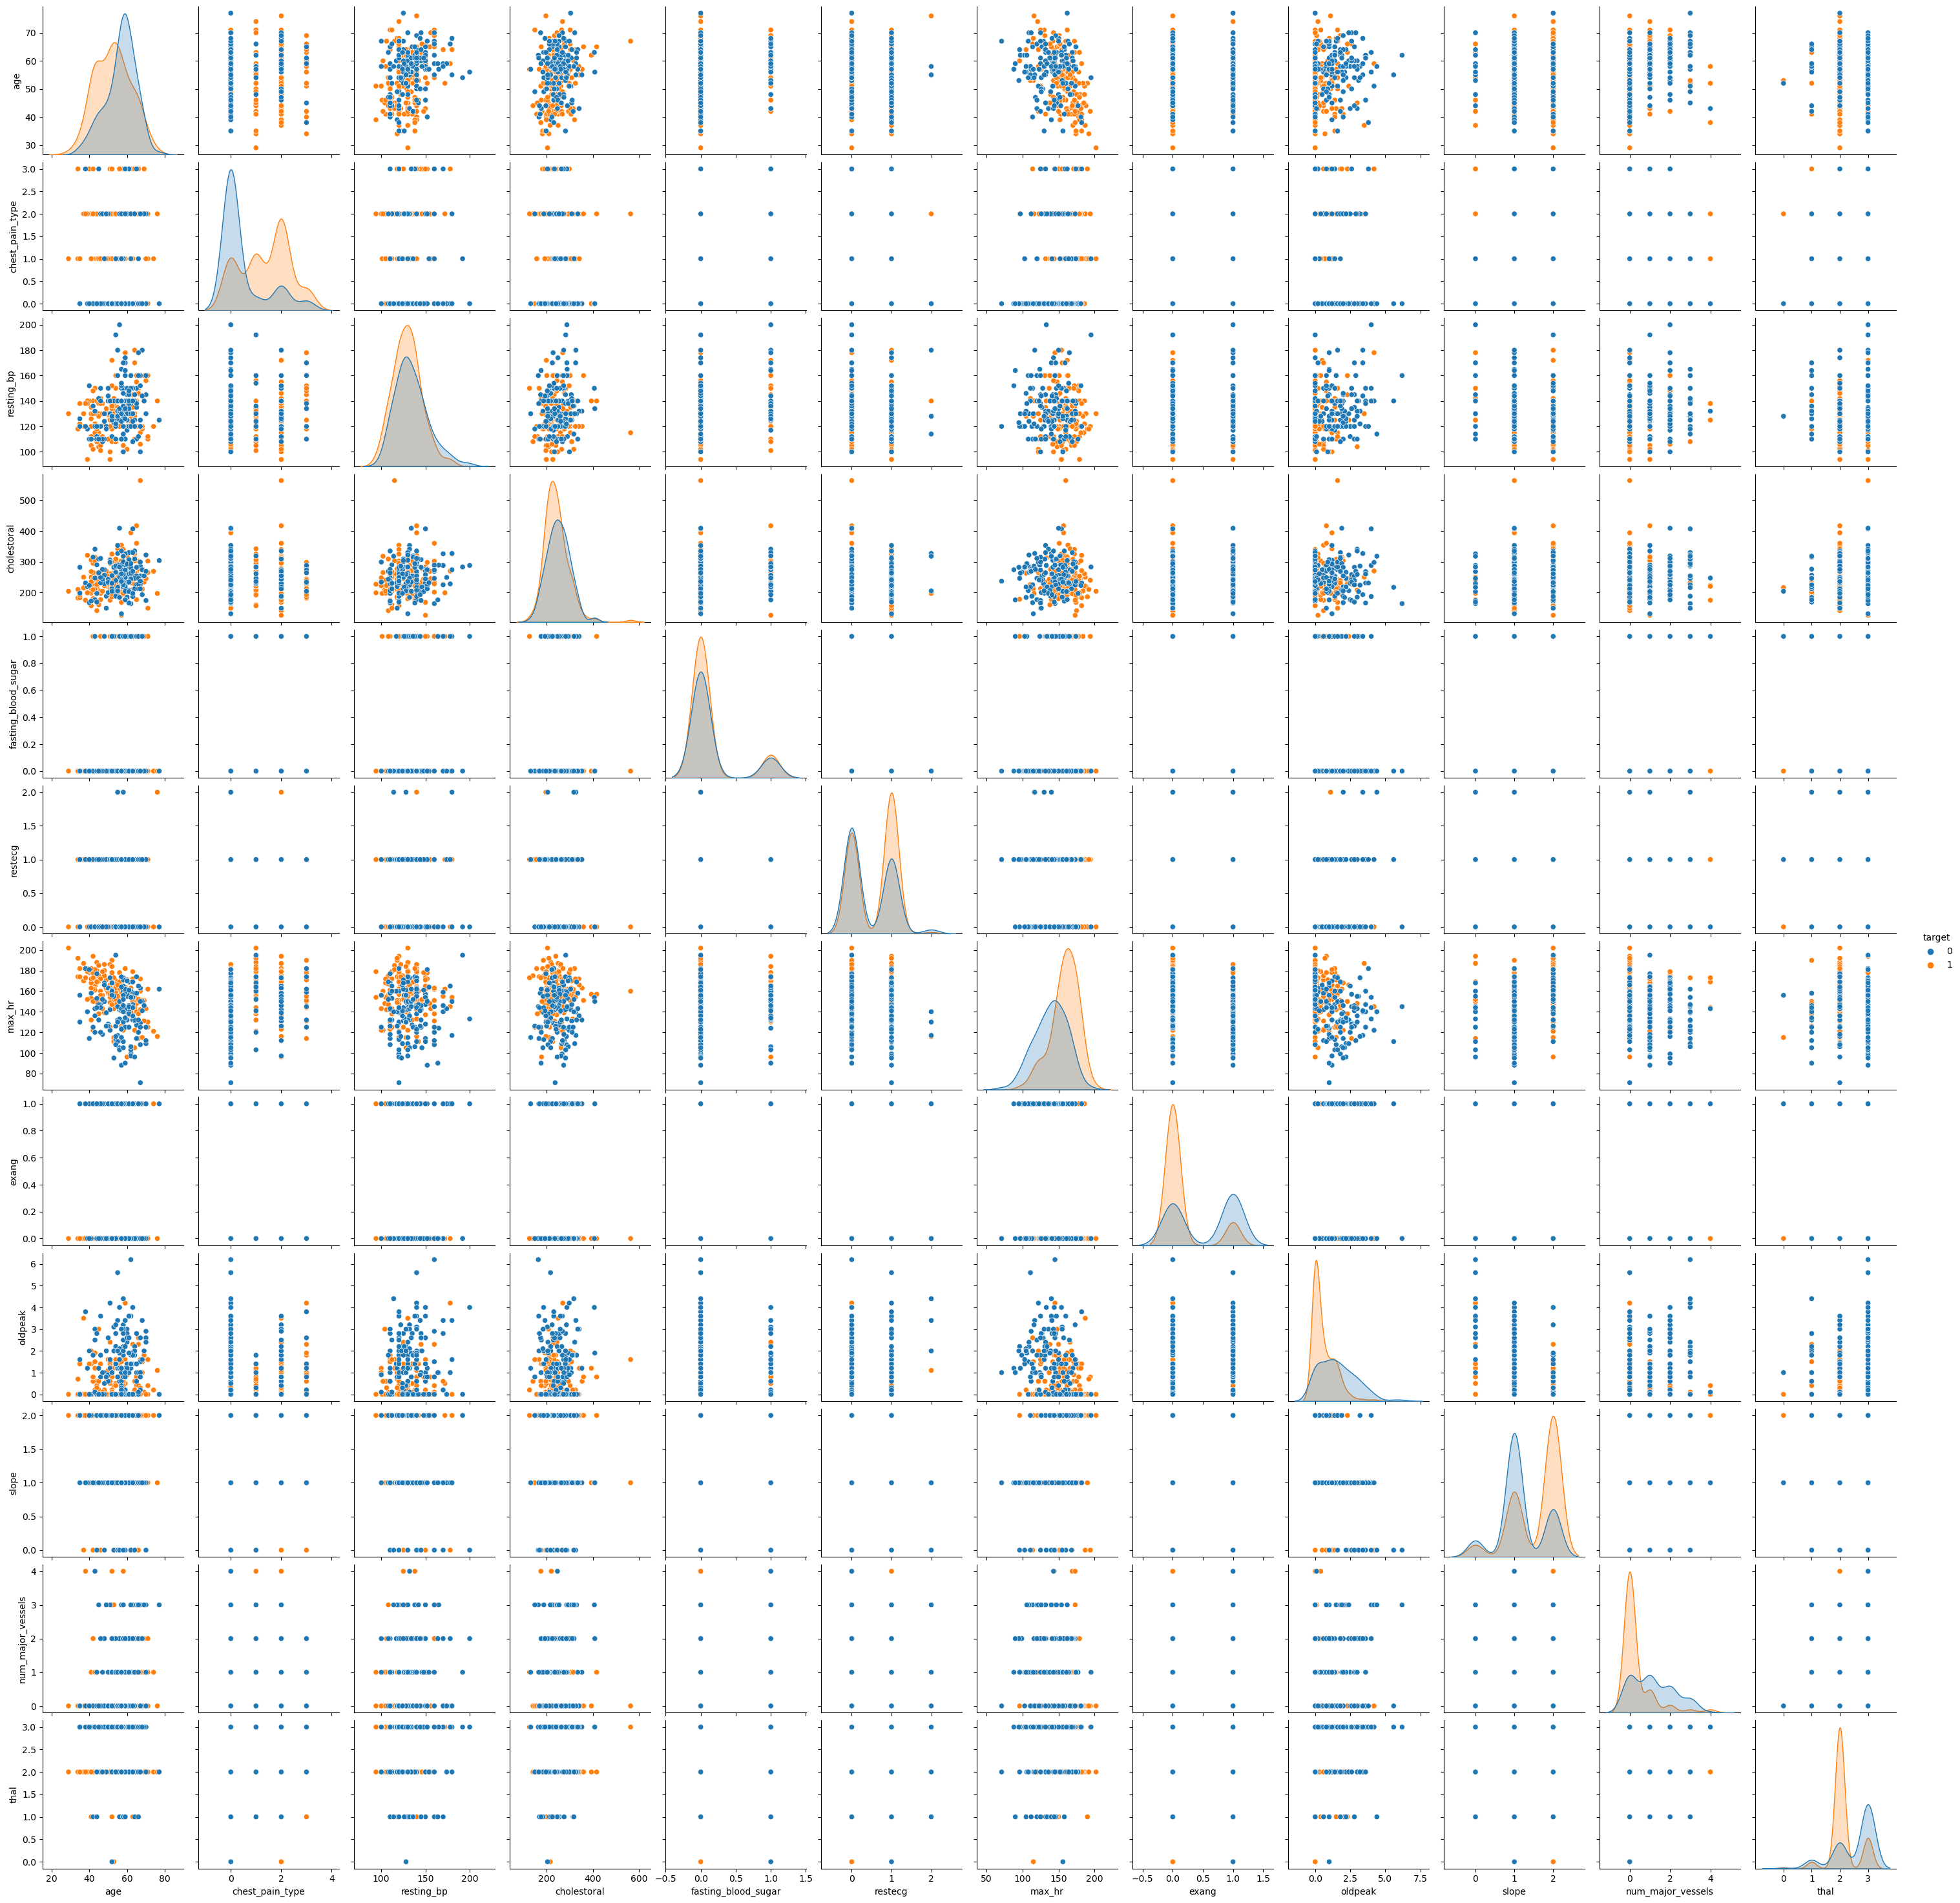

In [13]:
sns.pairplot(data, hue='target')


In [25]:
data

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
0,63,male,3,145,233,1,0,150,0,2.3,0,0,1,Disease
1,37,male,2,130,250,0,1,187,0,3.5,0,0,2,Disease
2,41,female,1,130,204,0,0,172,0,1.4,2,0,2,Disease
3,56,male,1,120,236,0,1,178,0,0.8,2,0,2,Disease
4,57,female,0,120,354,0,1,163,1,0.6,2,0,2,Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,female,0,140,241,0,1,123,1,0.2,1,0,3,No Disease
299,45,male,3,110,264,0,1,132,0,1.2,1,0,3,No Disease
300,68,male,0,144,193,1,1,141,0,3.4,1,2,3,No Disease
301,57,male,0,130,131,0,1,115,1,1.2,1,1,3,No Disease


In [26]:
data["target"].value_counts()


Disease       164
No Disease    138
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

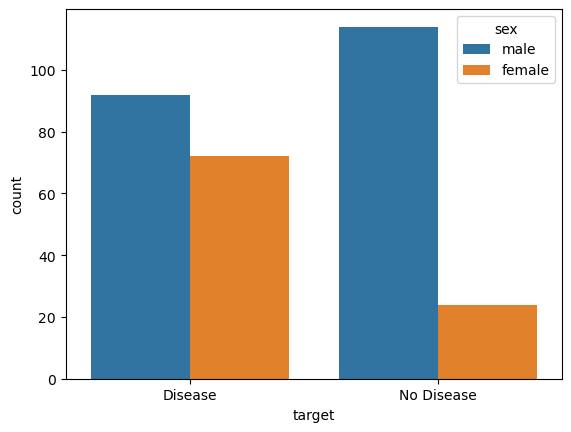

In [32]:
sns.countplot(data = data ,x="target",hue="sex")


<AxesSubplot:xlabel='resting_bp', ylabel='Count'>

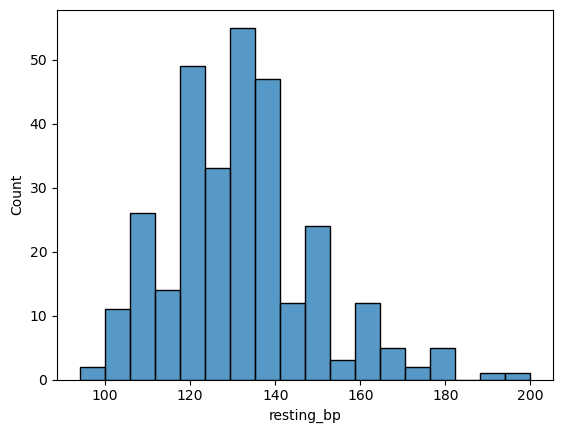

In [36]:
sns.histplot(x=data["resting_bp"])